In [1]:
using LinearAlgebra
using Plots
pyplot();


We have learned what is and how to interpolation. 

For given $(t_0,y_0), (t_1,y_1), \cdots, (t_n, y_n)$, exists a unique polynomial $p$ of order $\leq n$, such that $p(t_i) = y_i, i = 0,1, \cdots,n$.

## Lagrange Formula

We use Lagrange Formula for interpolation by **polynomials**. The main problem is to construct the cardinal funtion $l_k, k = 0,1,\cdots,n$, that

$$
l_k(t_j) = \left\{\begin{aligned}&1, j = k\\&0, \text{otherwise}\end{aligned}\right.
$$

note that the cardinal funtion only depends on the nodes, not the function itself.

Now we have 

$$
    f(x) \approx g(x) = \sum_{k = 0}^{n} c_k l_k (x) = \sum_{k = 0}^{n} y_k l_k (x).
$$

and 

$$
    l_k(x) = \prod_{i = 0}^{n} \frac{x - t_i}{t_k - t_i}.
$$

We define the error funtion to estimate the global error, which is a polunomial of order $n + 1$, and only depends on nodes: 

$$
    \Phi (x) := \prod_{i = 0}^n (x - t_i).
$$

Then there is the error estimate:


<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Theorem 1:</strong> 
  
  $\forall x \in [a,b], \exists \zeta \in [a,b]$, such that

$$
    f(x) - p(x) = \frac{f^{(n - k)}(\zeta)}{(n + 1)!}\Phi (x).
$$
</div>

<div style="margin-left: 20px;">
  <strong>Proof:</strong> 
  
  If $x = t_i$, the equality trivially holds, 
  
  otherwise, define 
  
  $$
     g_x(s) = \Phi(s)[f(x) - p(x)] - \Phi(x)[f(s) - p(s)];
  $$

then $g_x(t_i) = 0, i = 0,1, \cdots, n$, and $ g_x(x) = 0 $. We observe that 

$g_x$ has $n + 2$ zero points on $[a,b]$;

$g_x^\prime$ has $n + 1$ zero points on $[a,b]$, by Rolle's theorem;

$\cdots$

$g_x^{(n + 1)}$ has $1$ zero points on $[a,b]$, denoting $\zeta = \zeta(x)$.

Since the $x^{n + 1}$ term of $\Phi$ is 1, so $\Phi^{(n + 1)} (t) = (n + 1)!$

Since $p$ is a polynomial of order $n$, so $p^{(n + 1)} = 0$

then 

$$
    0 = g_x^{(n + 1)}(\zeta) =\Phi^{(n + 1)}(\zeta)(f(x) - g(x)) - \Phi(x)(f^{(n + 1)}(\zeta) - g^{(n + 1)}(\zeta) ) = (n + 1)! (f(x) - p(x)) - \Phi(x) f^{(n + 1)}(\zeta).
$$ &#x25A1
</div>

From the theorem above, the computation of $l_k$ requires the multiplication of $n$ items, so the entire interpolation is of $O(n^2)$. 

## Barycentric Formula

We define Barycentric weight as 

$$
    \omega_k = \frac{1}{\prod_{j = 0,j \neq k}^{n}(t_j - t_k)} = \frac{1}{\Phi^\prime(x)|_{x = t_k}}, k = 0,1, \cdots , n
$$

which yields the following theorem, by Barycentric


<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Theorem 1:</strong> 
  
  For given $(t_k, y_k), k = 0,1, \cdots, n$, where $t_k$ is different pairwisely. Then the interpolation polynomial is 
  
  $$
    p(x) = \frac{\sum_{k = 0}^{n}\frac{\omega_k y_k}{x - t_k}}{\sum_{k = 0}^{n}\frac{\omega_k}{x - t_k}}
  $$
</div>

Notice that as $x = t_k$, $p(x)$ could be defined as $\lim_{x \to t_k}p(x)$, since $p(x)$ can be prolonged continuously.

Comparing with the interpolation by the cardinal function $l_k$, this Barycentric Method is more stable.

We try to use this more stable method to encapsulate an interpolation function

`polyinterp(t,y)` :Construct a callable polynomial interpolant through the points in vectors `t`,`y` using the barycentric interpolation formula.

In [7]:
begin
    function polyinterp(t,y)
       n = length(t)
       ω = ones(n)
       for k in 1:n
        product = 1.0
        for j in 1:n
            if j != k
                product *= (t[k] - t[j])
            end
        end
        ω[k] = 1 / product          
       end
       return function p(x)
        numerator = 0.0
        denominator = 0.0
        for k in 1:n
            w_k = ω[k]
            numerator += w_k * y[k] / (x - t[k])
            denominator += w_k / (x - t[k])
        end
        return numerator / denominator
    end
    end
end

polyinterp (generic function with 1 method)

We now choose a function $f(x) = \sin (\exp (2x))$ over the interval $[0,1]$.  We take nodes uniformly first.

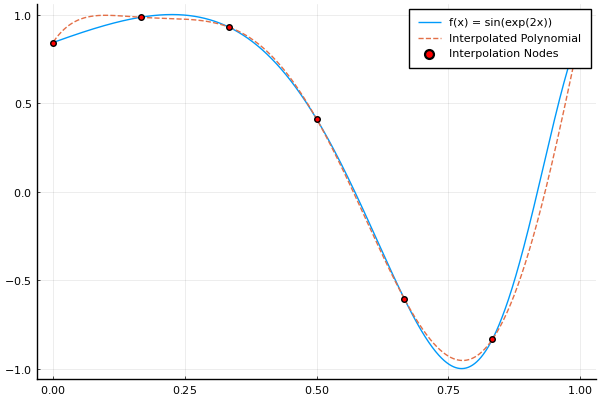

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [5]:
f = x -> sin(exp(2x))
a,b = 0,1
num = 6
h = (b-a)/num
t = @. a + h*(0:num)
y = f.(t)
p = polyinterp(t,y)
# Generate x values for plotting the interpolated curve
x_vals = LinRange(a, b, 1000)  # More points for smooth plot
y_vals = p.(x_vals)  # Evaluate the interpolant at these x values
# Plot the function and its interpolation
plot(x_vals, f.(x_vals), label="f(x) = sin(exp(2x))", linewidth=1)
plot!(x_vals, y_vals, label="Interpolated Polynomial", linestyle=:dash, linewidth=1)
scatter!(t, y, label="Interpolation Nodes", color=:red, marker=:circle)

## Stability of Polynomial Interpolation

We define 
$$
    \Phi(x) = \prod_{k = 0}^n (x - t_k)
$$
as an error indicator. Each time passes through zero at an interpolation node, the value on the log scale should go to $- \infty$, which explains the numerous cusps on the curves.

Notice that the error inidicator only relies on the choosing of the interpolation nodes, so it is a function of $\{t_k\}_k$ obviously.

We shall first draw the error indicator of a uniform grid.

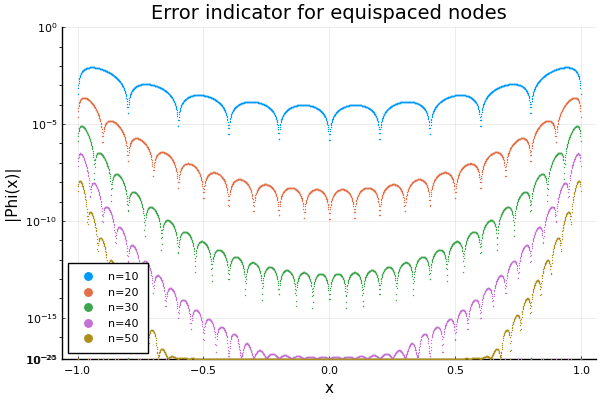

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [6]:
begin
    plot(xaxis=("x"),yaxis=(:log10,"|Phi(x)|",[1e-25,1]),legend=:bottomleft)
    xx = range(-1,1,length=2001)
    for n in 10:10:50
        t = range(-1,1,length=n+1)
        Φ = [ prod(xₖ.-t) for xₖ in xx ]
        scatter!(xx,abs.(Φ),m=(1,stroke(0)),label="n=$n")
    end
    title!("Error indicator for equispaced nodes")
end

We observe that, the value of $|\Phi|$ is obviously greater near the both edge of an interval than it is on the "Hinterland". This is called Runge Pheomenon, causing instability.

We have proven the theorem that if $t_1, \cdots, t_n$ are different pairwisely on $[a,b]$, $f(x) \in C^{n + 1}([a,b])$, polynomial $p_n$ is interpolation of $f$ with respect to $\{t_i\}_i$. Then forall $x \in [a,b], \exists \xi \in [a,b]$
$$
    f(x) - p_n(x) = \frac{f^{(n + 1)}(\xi)}{(n+1)!} \Phi(x) 
$$

notice that it is a matter of $\frac{\|\Phi\|_{L^{\infty}}}{n!}$ , so if we can find a set of $\{t_i\}_i$ such that $\Phi(x)$ uniformly bounded with respect to different $u$, it becomes a nice algorithm.

We shall firstly find the relationship between $\|\Phi\|_{L^{\infty}}$ and number of nodes.



## A Visual Example for Runge Pheomenon

Consider a function
$$
    g(x) = \frac{1}{x^2 + 16}
$$
has infinitely many continuous derivatives on the entire real line and looks easy to approximate
over $[0,1]$ .

we shall first see the phenomenon for low degree circunstances.

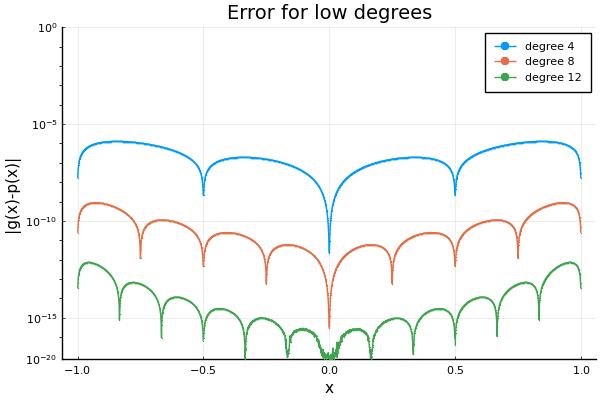

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [ ]:
begin
    g = x->1/(x^2 + 16)
    plot(xaxis=("x"),yaxis=(:log10,"|g(x)-p(x)|",[1e-20,1]))
    xt = range(-1,1,length=2501)
    nt = 4:4:12
    for (k,n) in enumerate(nt)
    t = range(-1,1,length=n+1) # equally spaced nodes
    y = g.(t) # interpolation data
    p = polyinterp(t,y)
    err = @. abs(g(xt)-p(xt))
    plot!(xt,err,m=(1,:o,stroke(0)),label="degree $n")
    end
    title!("Error for low degrees")
end

then, for higher degree

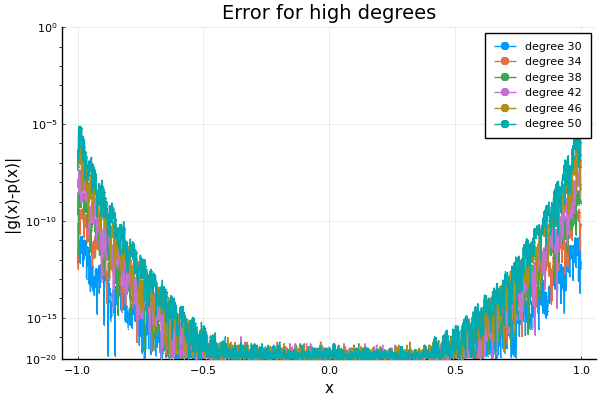

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [ ]:
begin
    # g = x->1/(x^2 + 16)
    plot(xaxis=("x"),yaxis=(:log10,"|g(x)-p(x)|",[1e-20,1]))
    xt = range(-1,1,length=2501)
    nt = 30:4:50
    for (k,n) in enumerate(nt)
    t = range(-1,1,length=n+1) # equally spaced nodes
    y = g.(t) # interpolation data
    p = polyinterp(t,y)
    err = @. abs(g(xt)-p(xt))
    plot!(xt,err,m=(1,:o,stroke(0)),label="degree $n")
    end
    title!("Error for high degrees")
end